In [10]:

# import os


# # Verify the current directory
# current_dir = os.getcwd()

# # Change to the desired directory
# os.chdir(f"{current_dir}/Depth-Anything-V2")

# current_dir = os.getcwd()

# print(f"Current directory: {current_dir}")

In [8]:
import os
import io
from PIL import Image as Image_PIL
import shutil
from datasets import load_dataset, Dataset, Image
from tqdm import tqdm
from huggingface_hub import login
from dotenv import load_dotenv

import os

load_dotenv()  # Load environment variables from .env file

from huggingface_hub import login


# --- Configuration ---

hf_token = os.getenv("HF_TOKEN")
openai_api = os.getenv("OPENAI_API_KEY")
login(hf_token)

hf_user = "Rajarshi-Roy-research"
# dataset_name = "ADE20K_OVSEG_Som"
# dataset_name = "Som_bench_refcocog_refseg"
dataset_name = "Flickr30k_Grounding_Som"
commit_message = "Updating dataset with VLM"
img_cols = ["image"]
image_to_process = "image"

# --- Helper Functions ---
def save_image_from_bytes(image_data, idx, image_folder):
    # print("HELLO")
    if isinstance(image_data,list):
        image_data = image_data[0]
        
    """Saves an image from byte data or PIL Image and returns the saved file path."""
    # print(image_data,type(image_data))
    try:
        if isinstance(image_data, Image_PIL.Image):
            image = image_data
        elif isinstance(image_data, bytes):
            image = Image_PIL.open(io.BytesIO(image_data))
        else:
            print(f"Unsupported image data type at row {idx}: {type(image_data)}")
            print("check")
            return None

        image_path = os.path.join(image_folder, f"image_{idx}.jpg")
        image.save(image_path, format="JPEG")
        print(f"✅ Saved: {image_path}")
        return image_path
    except Exception as e:
        print(f"❌ Error saving image at row {idx}: {e}")
        return None




def push_to_hugging_face(ds, img_cols, hf_user, dataset_name, commit_message, hf_token, private=False):
    """Pushes the dataset to the Hugging Face Hub."""
    for img_col in img_cols:
        ds = ds.cast_column(img_col, Image())

    try:
        ds.push_to_hub(
            repo_id=f"{hf_user}/{dataset_name}",
            commit_message=commit_message,
            token=hf_token,
            private=private,
        )
        print(f"✅ Dataset successfully uploaded: {hf_user}/{dataset_name}")
    except Exception as e:
        print(f"❌ Error pushing to Hugging Face Hub: {e}")



# --- Main Script ---
# Clean up existing image folder
for img_col in img_cols:
    if os.path.exists(img_col):
        shutil.rmtree(img_col)
    os.makedirs(img_col)

# Load dataset
# ds = load_dataset(f"{hf_user}/{dataset_name}",revision="a8196e2e83ea9c13ae9d3ed421c0edc27cc4a420")
ds = load_dataset(f"{hf_user}/{dataset_name}")
print(ds["train"][:1])

#Process images using the dataset object directly.
for img_col in img_cols:
    print(img_col)
    ds = ds.map(
        # lambda example, idx: {f"{img_col}": save_image_from_bytes(example[f"{img_col}"], idx, f"{img_col}")},
        lambda example, idx: {img_col: save_image_from_bytes(example[img_col], idx, img_col)},
        with_indices=True,
        num_proc=1 # Adjust as needed for performance
    )
    

# push_to_hugging_face(ds, img_cols, hf_user, dataset_name, commit_message, hf_token)

#Process and add captions (This part remains unchanged as it doesn't directly interact with image data)
try:
    #This section is not needed anymore since we are working directly with the dataset.
    #df = pd.read_csv("updated_dataset.csv") 
    pass
except FileNotFoundError:
    pass

ds["train"][:1]

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


{'id': [444845904], 'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1066x800 at 0x23B2019D660>], 'wbox_image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1066x800 at 0x23B2019D330>], 'prompt_components': ["['A man in a yellow helmet climbs a cliff face , snow behind him .'\n 'a man, a yellow helmet, a cliff face, snow']"], 'json_data': ["{'boxes': array([array([285.9569397 ,  52.67939377, 389.3494873 , 203.69972229]),\n       array([352.44180298,  52.29131699, 389.74865723,  79.8338623 ]),\n       array([  1.32843852, 187.75733948, 499.7583313 , 374.63452148]),\n       array([  1.56399608,   1.82078409, 499.49630737, 212.78866577])],\n      dtype=object), 'caption': '(A man) in (a yellow helmet) climbs (a cliff face) , (snow) behind him .', 'gt_anno_ids': None, 'gt_ids': array([4, 2, 3, 1])}"], 'depth_caption': ['Closest: a large metal structure\n----\nMid Range: a rock formation\n----\nFarthest: a man\n----\n']}
image


Map:   0%|          | 0/105 [00:00<?, ? examples/s]

✅ Saved: image\image_0.jpg
✅ Saved: image\image_1.jpg
✅ Saved: image\image_2.jpg
✅ Saved: image\image_3.jpg
✅ Saved: image\image_4.jpg
✅ Saved: image\image_5.jpg
✅ Saved: image\image_6.jpg
✅ Saved: image\image_7.jpg
✅ Saved: image\image_8.jpg
✅ Saved: image\image_9.jpg
✅ Saved: image\image_10.jpg
✅ Saved: image\image_11.jpg
✅ Saved: image\image_12.jpg
✅ Saved: image\image_13.jpg
✅ Saved: image\image_14.jpg
✅ Saved: image\image_15.jpg
✅ Saved: image\image_16.jpg
✅ Saved: image\image_17.jpg
✅ Saved: image\image_18.jpg
✅ Saved: image\image_19.jpg
✅ Saved: image\image_20.jpg
✅ Saved: image\image_21.jpg
✅ Saved: image\image_22.jpg
✅ Saved: image\image_23.jpg
✅ Saved: image\image_24.jpg
✅ Saved: image\image_25.jpg
✅ Saved: image\image_26.jpg
✅ Saved: image\image_27.jpg
✅ Saved: image\image_28.jpg
✅ Saved: image\image_29.jpg
✅ Saved: image\image_30.jpg
✅ Saved: image\image_31.jpg
✅ Saved: image\image_32.jpg
✅ Saved: image\image_33.jpg
✅ Saved: image\image_34.jpg
✅ Saved: image\image_35.jpg
✅ 

{'id': [444845904],
 'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1066x800>],
 'wbox_image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1066x800>],
 'prompt_components': ["['A man in a yellow helmet climbs a cliff face , snow behind him .'\n 'a man, a yellow helmet, a cliff face, snow']"],
 'json_data': ["{'boxes': array([array([285.9569397 ,  52.67939377, 389.3494873 , 203.69972229]),\n       array([352.44180298,  52.29131699, 389.74865723,  79.8338623 ]),\n       array([  1.32843852, 187.75733948, 499.7583313 , 374.63452148]),\n       array([  1.56399608,   1.82078409, 499.49630737, 212.78866577])],\n      dtype=object), 'caption': '(A man) in (a yellow helmet) climbs (a cliff face) , (snow) behind him .', 'gt_anno_ids': None, 'gt_ids': array([4, 2, 3, 1])}"],
 'depth_caption': ['Closest: a large metal structure\n----\nMid Range: a rock formation\n----\nFarthest: a man\n----\n']}

In [15]:
from gpt_4v import get_id_res_list_,request_gpt4v

# res = get_id_res_list(ds,10)
# res

In [65]:
ds["train"] = ds["train"].remove_columns("pred_res")


In [30]:
import json
import ast



In [33]:
import ast

def string_to_list(string_list):
    """Converts a string representation of a list with '\n ' as a separator into an actual Python list."""
    cleaned_string = string_list.replace(',', ';')  # Replace '\n ' with a comma and space
    cleaned_string = string_list.replace('\n ', ', ')  # Replace '\n ' with a comma and space
    return ast.literal_eval(cleaned_string)  # Safely convert to a list

# Example usage
string_data = "['A man in a yellow helmet climbs a cliff face , snow behind him .'\n 'a man, a yellow helmet, a cliff face, snow']"
converted_list = string_to_list(string_data)

print(converted_list)
# Output: ['A man in a yellow helmet climbs a cliff face , snow behind him .', 'a man, a yellow helmet, a cliff face, snow']


['A man in a yellow helmet climbs a cliff face , snow behind him .', 'a man, a yellow helmet, a cliff face, snow']


In [87]:
def update_pred_res(example, idx):
    try:
        # Only update if 'pred_res' is None
        if example.get("pred_res") is None:
            return {"pred_res": get_id_res_list_(ds, idx,obj_text="caption")}
        return {"pred_res": example["pred_res"]}  # Keep existing value
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return {"pred_res": None}  # Ensure the dataset structure remains intact

# Apply mapping incrementally
ds["train"] = ds["train"].map(
    update_pred_res, 
    with_indices=True, 
    batch_size=1,  # Process one example at a time
    load_from_cache_file=False  # Ensure immediate updates
)

print(ds)


Map:   0%|          | 0/105 [00:00<?, ? examples/s]

Each object in the image has a bright numeric ID at its center.

Identify the numeric ID for each of the following objects encapsulated between `(...)`  and return them in a Python list in the same order:

(A boat) turns right in an open river .
Image Caption about depth: 
Closest: a tree
----
Mid Range: a tree
----
Farthest: a boat on a lake
----



There are exactly 1 objects to identify, so your answer must contain 1 numeric IDs.
If the object is present in the image, return the ID you see, even if uncertain.
Do not guess or assume an ID—only use IDs visible in the image.
try to answer confidently with what you haveIf the object is completely missing from the image, return `-1`.
Return only a Python list of IDs, nothing else. Example: `[1, 2, -1, 4]`
res ```json
{
	"mapped_ids": [0]
}
```
{'mapped_ids': [0]}
Each object in the image has a bright numeric ID at its center.

Identify the numeric ID for each of the following objects encapsulated between `(...)`  and return them in a Pyt

In [66]:
# commit_message = "Added prediction response updated prompt with depth_caption"
commit_message = "Added captions and ref_ids"

push_to_hugging_face(ds, img_cols, hf_user, dataset_name, commit_message, hf_token)


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/105 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

✅ Dataset successfully uploaded: Rajarshi-Roy-research/Flickr30k_Grounding_Som


In [71]:

def get_prompt(obj_list, depth_caption):
    prompt = (
        "Each object in the image has a bright numeric ID at its center.\n\n"
        "Identify the numeric ID for each of the following objects encapsulated between `(...)`  and return them in a Python list in the same order:\n\n"
    )
    
    # obj_list = string_to_list(obj_list) 

    # for i in obj_list:
    #     prompt += f"- {i}\n"
    prompt += obj_list

    prompt += (
        f"\nImage Caption about depth: \n{depth_caption}\n\n"  # Added depth caption to prompt
        f"\nThere are exactly {count_entities(obj_list)} objects to identify, so your answer must contain {count_entities(obj_list)} numeric IDs.\n"
        "If the object is present in the image, return the ID you see, even if uncertain.\n"
        "Do not guess or assume an ID—only use IDs visible in the image.\n"
        "try to answer confidently with what you have"
        "If the object is completely missing from the image, return `-1`.\n"
        "Return only a Python list of IDs, nothing else. Example: `[1, 2, -1, 4]`"
    )

    return prompt


def get_id_res_list_(
    ds, index, obj_text="obj_text", image="image", depth_caption="depth_caption"
):

    img_path = ds["train"][index][image]
    obj_list = ds["train"][index][obj_text]
    depth_caption = ds["train"][index][depth_caption]
    # print(obj_list)
    message = get_prompt(obj_list, depth_caption)
    print(message)

    return request_gpt4v(message, img_path)


In [72]:
import re

def count_entities(text):
    """
    Counts the number of entities encapsulated in parentheses in the given text.

    Parameters:
        text (str): The input string containing entities in parentheses.

    Returns:
        int: The number of entities found in parentheses.
    """
    return len(re.findall(r"\(.*?\)", text))

# Example usage
text = "(A man) in (a yellow helmet) climbs (a cliff face) , (snow) behind him ."
print(count_entities(text))  # Output: 4


4


In [75]:
res = get_id_res_list_(ds,1,obj_text="caption")
res

Each object in the image has a bright numeric ID at its center.

Identify the numeric ID for each of the following objects encapsulated between `(...)`  and return them in a Python list in the same order:

(A teenage boy) is jumping (his bicycle) over (a large dirt hill) .
Image Caption about depth: 
Closest: the moon
----
Mid Range: a person
----
Farthest: a person
----



There are exactly 3 objects to identify, so your answer must contain 3 numeric IDs.
If the object is present in the image, return the ID you see, even if uncertain.
Do not guess or assume an ID—only use IDs visible in the image.
try to answer confidently with what you haveIf the object is completely missing from the image, return `-1`.
Return only a Python list of IDs, nothing else. Example: `[1, 2, -1, 4]`
res ```json
{
	"mapped_ids": [2, 3, 1]
}
```
{'mapped_ids': [2, 3, 1]}


[2, 3, 1]

In [73]:
from gpt_4v import request_gpt4v

def get_prompt(obj_list,depth_caption):
    prompt = (
        "Each object in the image has a bright numeric ID at its center.\n\n"
        "Identify the numeric ID for each of the following objects and return them in a Python list in the same order:\n\n"
    )

    for i in obj_list:
        prompt += f"- {i}\n"

    prompt += (
        f"\nImage Caption about depth: \n{depth_caption}\n\n" #Added depth caption to prompt
        f"\nThere are exactly {len(obj_list)} objects to identify, so your answer must contain {len(obj_list)} numeric IDs.\n"
        "If the object is present in the image, return the ID you see, even if uncertain.\n"
        "Do not guess or assume an ID—only use IDs visible in the image.\n"
        "try to answer confidently with what you have"
        "If the object is completely missing from the image, return `-1`.\n"
        "Return only a Python list of IDs, nothing else. Example: `[1, 2, -1, 4]`"
    )

    return prompt



def get_id_res_list_(ds, index):

    img_path = ds["train"][index]["image"]
    obj_list = ds["train"][index]["obj_text"]
    depth_caption = ds["train"][index]["depth_caption"]
    # print(obj_list)
    message = get_prompt(obj_list,depth_caption)
    print(message)

    return request_gpt4v(message, img_path)


In [75]:
res

[-1]

In [88]:
ds["train"]["pred_res"]

[[0, 1, 2, 3],
 [2, 3, 1],
 [0, 1, 2],
 [0, -1, 1],
 [0, 1],
 [0, 1, 2],
 [2, 3, 1],
 [1, 0, 3],
 [3, 2, 1, -1],
 [0],
 [0, 1, -1],
 [0, 1],
 [0, 1],
 [22],
 [0, 2, 1],
 [0, 1, 2],
 [2, 0, 1],
 [1, 0, 2],
 [0],
 [1, 0],
 [0, -1, 1],
 [2, -1, 4, 2],
 [1, 0],
 [0, 1],
 [0],
 [0, 1],
 [0],
 [0, 2, 1],
 [1, 7, 9, 2],
 [1, 0, 3, -1],
 [0, 3, 1, 3],
 [0, 3, 1, 2],
 [0, 1],
 [0, 1],
 [2, 1],
 [0, 2, 1],
 [0, 2, 1],
 [1, 0, 3, 2],
 [0, 1, 2],
 [1, 0, 2],
 [0, 1, 2],
 [0, 1],
 [0, 1, 2],
 [0, 1, 2],
 [0],
 [0, 2, 4],
 [6, 2, 0, 2],
 [2, 0],
 [1, 0],
 [1, 0],
 [0, 1, 2, 3],
 [1, 2, 0, 3],
 [1, 0, 2],
 [2, 0],
 [0],
 [0, 1, 3, 2],
 [0, 1],
 [0, 1],
 [0, 1, 2],
 [1, -1, 0],
 [0],
 [0, 1, 3, 4],
 [2],
 [1, 0, 2],
 [1, 0, 1],
 [0, 1],
 [0, 1, -1],
 [1, 0],
 [3, 2, 4, 2],
 [2, 5],
 [2, -1, 4, 1],
 [1, 2],
 [0, 3],
 [4, 2, 1, 3],
 [1, 0, 2, 4],
 [0, -1, 2, 1],
 [0, 1, 2],
 [1, 2, 0],
 [0, 2, 3, -1],
 [3, 1, 4, 2],
 [0],
 [0, 3, 5, 5, 6, 1],
 [0, 3, 1, -1],
 [0, 2, 3, 1],
 [0, 4],
 [3, -1, 0, 4, 0],
 [

In [92]:
import itertools
ref_id_list = list(itertools.chain(*ds["train"]["ref_ids"]))
pred_res_list = list(itertools.chain(*ds["train"]["pred_res"]))

In [90]:
# Ensure the lists have the same length before calculating accuracy
if len(ref_id_list) == len(pred_res_list):
    correct_matches = sum(1 for ref, pred in zip(ref_id_list, pred_res_list) if ref == pred)
    accuracy = correct_matches / len(ref_id_list)
    print(f"Accuracy: {accuracy:.4f}")
else:
    print("The two lists have different lengths. Accuracy cannot be computed.")


Accuracy: 0.2569


In [94]:
def calculate_accuracy(ref_id_list, pred_res_list):
    """
    Computes the accuracy between two lists by comparing element-wise matches.

    Parameters:
        ref_id_list (list): The reference (ground truth) list.
        pred_res_list (list): The predicted result list.

    Returns:
        float: The accuracy value if lengths match, otherwise None.
    """
    if len(ref_id_list) != len(pred_res_list):
        print("Error: The two lists have different lengths. Accuracy cannot be computed.")
        return None

    correct_matches = sum(1 for ref, pred in zip(ref_id_list, pred_res_list) if ref == pred)
    accuracy = correct_matches / len(ref_id_list)
    return accuracy

# Example usage
# ref_ids = [1, 2, 3, 4, 5]
# pred_ids = [1, 2, 3, 4, 5]  # Example where all predictions match

accuracy = calculate_accuracy(ref_id_list, pred_res_list)
if accuracy is not None:
    print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.2569


In [96]:
def calculate_recall_at_1(ref_id_list, pred_res_list):
    """
    Computes Recall@1 by checking if the correct reference ID is in the top-1 prediction.

    Parameters:
        ref_id_list (list): The ground truth reference list.
        pred_res_list (list): The predicted results (should be a list of top-1 predictions).

    Returns:
        float: Recall@1 score.
    """
    if len(ref_id_list) != len(pred_res_list):
        print("Error: The two lists have different lengths. Recall@1 cannot be computed.")
        return None

    correct_predictions = sum(1 for ref, pred in zip(ref_id_list, pred_res_list) if ref == pred)
    recall_at_1 = correct_predictions / len(ref_id_list)
    
    return recall_at_1

# Example usage
ref_ids = ref_id_list 
pred_ids = pred_res_list
recall_at_1 = calculate_recall_at_1(ref_ids, pred_ids)
if recall_at_1 is not None:
    print(f"Recall@1: {recall_at_1:.4f}")


Recall@1: 0.2569


In [79]:
mismatched_indexes = [
    index for index in range(len(ds["train"]["pred_res"]))
    if ds["train"]["pred_res"][index] is not None
    and ds["train"]["ref_ids"][index] is not None
    and len(ds["train"]["pred_res"][index]) != len(ds["train"]["ref_ids"][index])
]

print("Indexes with mismatched lengths:", mismatched_indexes)


Indexes with mismatched lengths: []


In [80]:
index=0
# ds["train"]["ref_ids"][index], ds["train"]["pred_res"][index], ds["train"]["obj_text"][index]
ds["train"]["ref_ids"][index], ds["train"]["pred_res"][index], 

([4, 2, 3, 1], [0, 1, 2, 3])

In [93]:
img_path = ds["train"][index]["image"]
obj_list = ds["train"][index]["obj_text"]
depth_caption = ""
# print(obj_list)
message = get_prompt(obj_list,depth_caption)
print(message)

request_gpt4v(message, img_path)

Each object in the image has a bright numeric ID at its center.

Identify the numeric ID for each of the following objects and return them in a Python list in the same order:

- A black cow that is only half visible standing close to a fully visible cow.
- The far right black cow.; cow on the far right who is barely visible; cow butt 3:00; cow barely showing; cow far right; far right cow butt
- A cow standing in high grass wearing an ear tag with the number 342.; Cow with a number 312 on a tag on its ear.; yellow tag in ear; cow with tag; Cow with yellow tag; middle cow; big cow yellow tag; center cow

Image Caption about depth: 



There are exactly 3 objects to identify, so your answer must contain 3 numeric IDs.
If the object is present in the image, return the ID you see, even if uncertain.
Do not guess or assume an ID—only use IDs visible in the image.
try to answer confidently with what you haveIf the object is completely missing from the image, return `-1`.
Return only a Python 

[1, 3, 2]

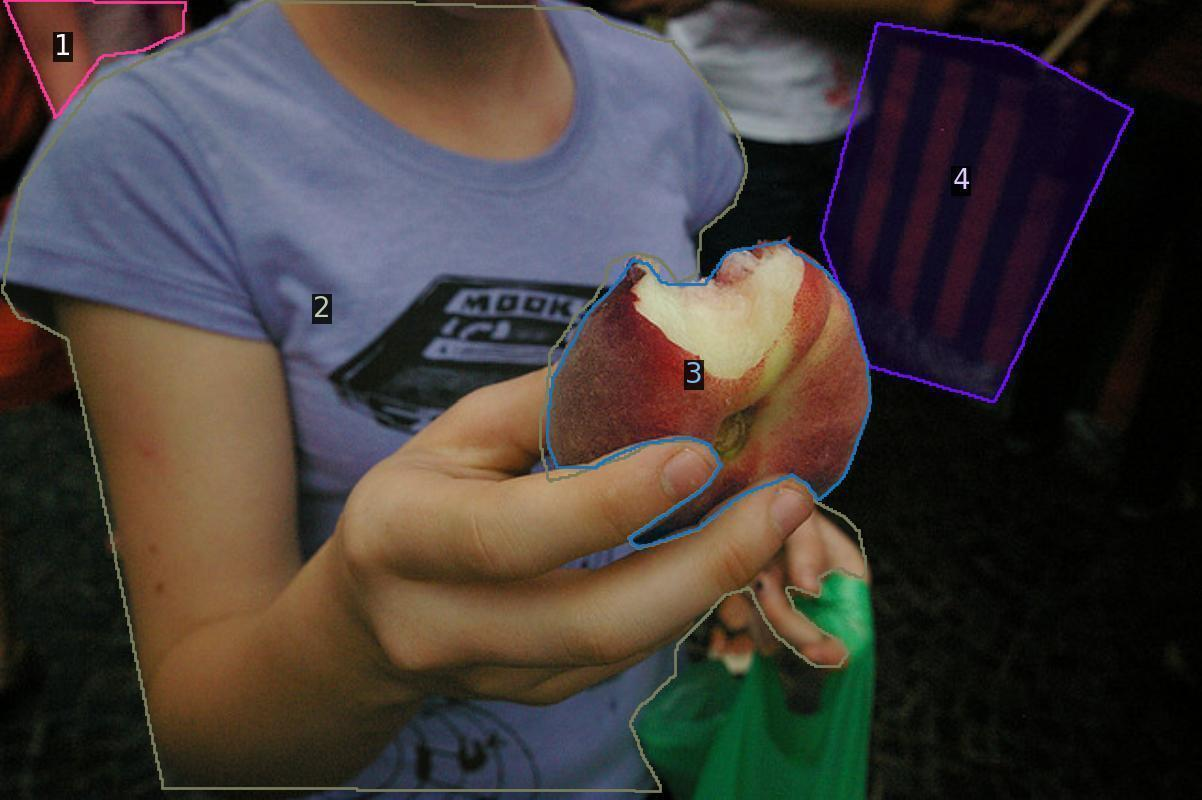

In [16]:
ds["train"]["image"][index]

In [33]:
get_id_res_list_(ds, 43)

Each object in the image has a bright numeric ID at its center.

Identify the ID for each of the following objects (one ID per item) and return them as a Python list in the same order:

- a girl holding a donut; The woman who is wearing a blue shirt.

Each bulleted item (`-`) describes an object in detail. There are 1 objects to identify.
Always provide an ID if the object or a living being is identified in the image.
If no ID can be found for an item, return `-1` in its place.
Return only a Python list of IDs. Example: `[1, 2, -1, 4]`
res ```json
{
	"mapped_ids": [2]
}
```
{'mapped_ids': [2]}


[2]

In [44]:
# Ensure "ref_ids" takes the value of "gt_ids" inside "json_data"
ds["train"]["ref_ids"] = ds["train"]["json_data"]["gt_ids"]


TypeError: list indices must be integers or slices, not str

In [64]:
import json
import os

def update_ref_ids(ds, folder_path):
    """
    Updates ds["train"] by adding a new column 'ref_ids' with extracted 'gt_ids' from JSON files.

    Parameters:
        ds (Dataset): The dataset object containing 'train' -> 'id'.
        folder_path (str): The path to the folder containing JSON files.

    Returns:
        Dataset: The updated dataset with the 'ref_ids' column added.
    """
    ref_ids = []  # List to store extracted 'gt_ids'

    for file_id in ds["train"]["id"]:
        file_path = os.path.join(folder_path, f"{file_id}.json")

        # Default value if the file is missing or does not contain 'gt_ids'
        gt_ids = None  

        if os.path.exists(file_path):
            try:
                with open(file_path, "r", encoding="utf-8") as file:
                    json_data = json.load(file)
                # gt_ids = json_data.get("gt_ids", None)  # Get 'gt_ids' if available
                caption = json_data.get("caption", None)  # Get 'gt_ids' if available
            except Exception as e:
                print(f"Error reading {file_id}.json: {e}")

        # ref_ids.append(gt_ids)  # Store in list
        ref_ids.append(caption)  # Store in list

    # Add 'ref_ids' as a new column to the dataset
    # ds["train"] = ds["train"].add_column("ref_ids", ref_ids)
    ds["train"] = ds["train"].add_column("caption", ref_ids)

    return ds  # Return the updated dataset

# Example usage
folder_path = r"E:\Personal Projects\SoM-Depth\Depth-SoM\flickr30k_grounding\som_images"
ds = update_ref_ids(ds, folder_path)

# Check the updated dataset
print(ds["train"][0])  # Print the first row to verify the 'ref_ids' column


{'id': 444845904, 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1066x800 at 0x23B240A2200>, 'wbox_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1066x800 at 0x23B240A21D0>, 'prompt_components': "['A man in a yellow helmet climbs a cliff face , snow behind him .'\n 'a man, a yellow helmet, a cliff face, snow']", 'json_data': "{'boxes': array([array([285.9569397 ,  52.67939377, 389.3494873 , 203.69972229]),\n       array([352.44180298,  52.29131699, 389.74865723,  79.8338623 ]),\n       array([  1.32843852, 187.75733948, 499.7583313 , 374.63452148]),\n       array([  1.56399608,   1.82078409, 499.49630737, 212.78866577])],\n      dtype=object), 'caption': '(A man) in (a yellow helmet) climbs (a cliff face) , (snow) behind him .', 'gt_anno_ids': None, 'gt_ids': array([4, 2, 3, 1])}", 'depth_caption': 'Closest: a large metal structure\n----\nMid Range: a rock formation\n----\nFarthest: a man\n----\n', 'pred_res': [0, -1], 'ref_ids': [4, 2, 3, 1], 'caption'

In [59]:
ds["train"]["id"]

[444845904,
 4633636089,
 3373615534,
 3516521516,
 3476451861,
 3395176505,
 1403414927,
 2873837796,
 2908391335,
 2916179149,
 7998492801,
 3091338773,
 452363869,
 2862481071,
 1100214449,
 3343900764,
 2963672852,
 2097650932,
 2501232125,
 3249787980,
 3296124052,
 1121053156,
 3418504074,
 50594334,
 2973355135,
 3036596725,
 396129701,
 164428441,
 2252299187,
 1717077532,
 424869823,
 2315325912,
 481632457,
 876964091,
 6323932349,
 7289004844,
 400106578,
 2371475978,
 14868339,
 2891451496,
 2155994202,
 3259757648,
 3217893350,
 512031915,
 3333017828,
 2294516804,
 4297527221,
 3369258147,
 2425411995,
 3357194782,
 35929050,
 3231276002,
 3873728049,
 6769024927,
 6776555426,
 2456907314,
 4606346038,
 7291465794,
 2512447018,
 208469029,
 7125476937,
 2970162432,
 211402278,
 3019473225,
 2909081008,
 2542285730,
 8038855203,
 3395054199,
 2295920018,
 4641652790,
 4931423774,
 2638054798,
 4436200118,
 3726120436,
 3639105305,
 2866820467,
 2255338013,
 3056464479,
 20

In [57]:
import re
import ast

def clean_numpy_arrays(text):
    """
    Converts 'array([...])' patterns into Python lists '[...]'
    to make the string valid for parsing.
    """
    # Remove `array(...)` wrapping
    text = re.sub(r'array\((\[.*?\])\)', r'\1', text)
    
    # Remove dtype=object (if present)
    text = re.sub(r',\s*dtype=object', '', text)

    return text

# Example string with NumPy arrays
raw_text = """{'boxes': array([array([  1.66244805, 146.71722412, 388.72827148, 332.51785278]),
       array([103.97445679,  23.06296539, 278.24066162, 316.99960327]),
       array([ 74.22357178,  66.30656433, 298.15478516, 325.5171814 ])],
      dtype=object), 'caption': '(A man) and (woman) kiss as they stand along (a gravel path) .', 
      'gt_anno_ids': None, 'gt_ids': array([3, 1, 2])}"""

# Clean the text to remove NumPy array notation
clean_text = clean_numpy_arrays(raw_text)

# Convert the cleaned string to a dictionary
parsed_dict = ast.literal_eval(clean_text)

# Print the cleaned dictionary
print(parsed_dict)


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' on line 1 (<unknown>, line 3)

In [56]:
import re
import ast

def clean_numpy_arrays(text):
    """
    Converts 'array([...])' patterns into Python lists '[...]'
    to make the string valid for parsing.
    """
    # Replace 'array([...])' with '[...]' using regex
    text = re.sub(r'array\((\[.*?\])\)', r'\1', text)
    return text

# Extract the last item in json_data
raw_text = ds["train"]["json_data"][-1]

# Clean the text to remove NumPy array notation
clean_text = clean_numpy_arrays(raw_text)

# Convert the cleaned string to a dictionary
json_data = ast.literal_eval(clean_text)

# Output the dictionary
print(json_data)


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' on line 1 (<unknown>, line 3)

In [31]:
def update_pred_res(example, idx):
    try:
        # Only update if 'pred_res' is None or if lengths mismatch
        if example.get("pred_res") is None or (example.get("pred_res") is not None and example.get("ref_ids") is not None and len(example["pred_res"]) != len(example["ref_ids"])):
            if idx in mismatched_indexes:
                return {"pred_res": get_id_res_list_(ds, idx)}
            else:
                return {"pred_res": example["pred_res"]}
        return {"pred_res": example["pred_res"]}  # Keep existing value
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return {"pred_res": None}  # Ensure the dataset structure remains intact

# Apply mapping incrementally
ds["train"] = ds["train"].map(
    update_pred_res, 
    with_indices=True, 
    batch_size=1,  # Process one example at a time
    load_from_cache_file=False  # Ensure immediate updates
)

print(ds)


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'image', 'obj_text', 'ref_ids', 'json_data', 'depth_caption', 'pred_res'],
        num_rows: 100
    })
})


In [8]:
commit_message = "Added prediction response updated prompt"

push_to_hugging_face(ds, img_cols, hf_user, dataset_name, commit_message, hf_token)


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

✅ Dataset successfully uploaded: Rajarshi-Roy-research/Som_bench_refcocog_refseg
